# Experiment 1: Results

In [73]:
import numpy as np
from visualization.utils import make_defaults, wandb2df, get_track_and_states_df, plot_states
from visualization.utils import defaults as d
from helpers.paths import Path
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
make_defaults()

## Summary Results

In [2]:
# Load data
df_summary_sac = pd.read_csv(Path().data / 'exp1_reference_signals_50if8s9r_summary.csv')
df_summary_dsac = pd.read_csv(Path().data / 'exp1_reference_signals_7xn8j40b_summary.csv')

In [3]:
def prepare_df(df):
    interest_columns = ['task_train', 'online/nmae', 'eval/nmae', 'sac_improvement']
    df = df[interest_columns]
    df = pd.melt(df, id_vars=['task_train'], value_vars=['online/nmae', 'eval/nmae'])
    df = df.rename(columns={'variable': 'model', 'value': 'nmae'})
    new_task_names = {'exp1_fixed_sin': 'Task 1', 'exp1_hold': 'Task 2', 'exp1_pseudo_random_sin': 'Task 3'}
    df['task_train'] = df['task_train'].map(new_task_names)
    new_model_names = {'online/nmae': 'Hybrid', 'eval/nmae': 'None-Hybrid'}
    df['model'] = df['model'].map(new_model_names)
    df.sort_values(by=["task_train"], inplace=True)
    df['nmae'] *= 100
    return df


In [ ]:
df_sac_improvement = df_summary_sac[['task_train', 'sac_improvement']].copy()
df_sac_improvement['model'] = "SAC-hybrid"

df_dsac_improvement = df_summary_dsac[['task_train', 'sac_improvement']].copy()
df_dsac_improvement['model'] = "DSAC-hybrid"

df_improvement = pd.concat([df_sac_improvement, df_dsac_improvement])
new_task_names = {'exp1_fixed_sin': 'Task 1', 'exp1_hold': 'Task 2', 'exp1_pseudo_random_sin': 'Task 3'}
df_improvement['task_train'] = df_improvement['task_train'].map(new_task_names)
df_improvement.sort_values(by=["task_train"], inplace=True)

fig = px.box(df_improvement,
             x="task_train",
             y="sac_improvement",
             color="model", )

fig.update_yaxes(
    ticksuffix="%",
)

fig.update_layout(
    xaxis_title="Tracking Task",
    yaxis_title="nMAE Improvement",
    font=d.font,
    width=d.width,
    height=400,
    legend=dict(
        title=None, orientation="h", y=1, yanchor="bottom", x=0.5, xanchor="center"
    ),
    margin=dict(
        t=1,
        r=3,
        b=1,
        l=1
    ),
)

fig.show()

if False:
    fig.write_image(str(Path().paper_figures / 'exp1_improvement.pdf'))

In [ ]:
df_sac = prepare_df(df_summary_sac)
df_sac.groupby(['task_train', 'model']).agg(['mean', 'std'])

In [ ]:
df_dsac = prepare_df(df_summary_dsac)
df_dsac.groupby(['task_train', 'model']).agg(['mean', 'std'])

## Runs evaluation

In [ ]:
# SAC eval track and states dataframes
df_sac_eval = wandb2df(pd.read_csv(Path().data / 'exp1_sac_eval.csv'), 'eval/step')
df_sac_eval_states = wandb2df(pd.read_csv(Path().data / 'exp1_sac_eval_states.csv'), "citation_states/step")

# SAC online track and states dataframes
df_sac_online = wandb2df(pd.read_csv(Path().data / 'exp1_sac_online.csv'), 'online/step')
df_sac_online.rename(columns={"action_da": "da", "action_dr": "dr", "action_de": "de"}, inplace=True)
df_sac_online_states = wandb2df(pd.read_csv(Path().data / 'exp1_sac_online_states.csv'), "online_states/step")

# DSAC eval track and states dataframes
df_dsac_eval = wandb2df(pd.read_csv(Path().data / 'exp1_dsac_eval.csv'), 'eval/step')
df_dsac_eval_states = wandb2df(pd.read_csv(Path().data / 'exp1_dsac_eval_states.csv'), "citation_states/step")

# DSAC online track and states dataframes
df_dsac_online = wandb2df(pd.read_csv(Path().data / 'exp1_dsac_online.csv'), 'online/step')
df_dsac_online.rename(columns={"action_da": "da", "action_dr": "dr", "action_de": "de"}, inplace=True)
df_dsac_online_states = wandb2df(pd.read_csv(Path().data / 'exp1_dsac_online_states.csv'), "online_states/step")

# TASK 2

## SAC

In [ ]:
df_track, df_states =  get_track_and_states_df(df_summary_sac, df_sac_eval, df_sac_eval_states, task=", task='exp1_pseudo_random_sin'")
_, _ = plot_states(df_track, df_states)

In [ ]:
df_track_online, df_states_online =  get_track_and_states_df(df_summary_sac, df_sac_online, df_sac_online_states, task='exp1_pseudo_random_sin')
_, _ = plot_states(df_track_online, df_states_online)

## DSAC

In [ ]:
df_track, df_states =  get_track_and_states_df(df_summary_dsac, df_dsac_eval, df_dsac_eval_states, task='exp1_pseudo_random_sin')
_, _ = plot_states(df_track, df_states)

In [ ]:
df_track_online, df_states_online =  get_track_and_states_df(df_summary_dsac, df_dsac_online, df_dsac_online_states, task='exp1_pseudo_random_sin')
_, _ = plot_states(df_track_online, df_states_online)

# Other tasks

In [ ]:
def plot_tracking(df_track, df_track_online) :
    dpi = 100

    fig, axes = plt.subplots(1, 3, sharex=True, figsize=(800//dpi, 200//dpi), dpi=dpi)

    sns.lineplot(data=df_track, x='step', y='theta_ref', ax=axes[0], linestyle="dashed", color="grey")
    sns.lineplot(data=df_track, x='step', y='theta', ax=axes[0],)
    sns.lineplot(data=df_track_online, x='step', y='theta', ax=axes[0],)
    axes[0].set_ylabel(r"$\theta$ [deg]")

    sns.lineplot(data=df_track, x='step', y='phi_ref', ax=axes[1], linestyle="dashed", color="grey")
    sns.lineplot(data=df_track, x='step', y='phi', ax=axes[1],)
    sns.lineplot(data=df_track_online, x='step', y='phi', ax=axes[1],)
    axes[1].set_ylabel(r"$\phi$ [deg]")

    sns.lineplot(data=df_track, x='step', y='beta_ref', ax=axes[2], linestyle="dashed", color="grey")
    sns.lineplot(data=df_track, x='step', y='beta', ax=axes[2],)
    sns.lineplot(data=df_track_online, x='step', y='beta', ax=axes[2],)
    axes[2].set_ylabel(r"$\beta$ [deg]")

    axes[0].set_xlabel("Time [s]")
    axes[1].set_xlabel("Time [s]")
    axes[2].set_xlabel("Time [s]")

    plt.tight_layout(pad=0.2)
    return fig, axes

In [ ]:
df_track, df_states =  get_track_and_states_df(df_summary_sac, df_sac_eval, df_sac_eval_states, task='exp1_hold')
df_track_online, df_states_online =  get_track_and_states_df(df_summary_sac, df_sac_online, df_sac_online_states, task='exp1_hold')

_, _ = plot_tracking(df_track, df_track_online)

In [ ]:
df_track, df_states =  get_track_and_states_df(df_summary_sac, df_sac_eval, df_sac_eval_states, task='exp1_fixed_sin')
df_track_online, df_states_online =  get_track_and_states_df(df_summary_sac, df_sac_online, df_sac_online_states, task='exp1_fixed_sin')

_, _ = plot_tracking(df_track, df_track_online)

In [ ]:
df_track, df_states =  get_track_and_states_df(df_summary_dsac, df_dsac_eval, df_dsac_eval_states, task='exp1_hold')
df_track_online, df_states_online =  get_track_and_states_df(df_summary_dsac, df_dsac_online, df_dsac_online_states, task='exp1_hold')

_, _ = plot_tracking(df_track, df_track_online)

In [ ]:
df_track, df_states =  get_track_and_states_df(df_summary_dsac, df_dsac_eval, df_dsac_eval_states, task='exp1_fixed_sin')
df_track_online, df_states_online =  get_track_and_states_df(df_summary_dsac, df_dsac_online, df_dsac_online_states, task='exp1_fixed_sin')

_, _ = plot_tracking(df_track, df_track_online)

# Plot reference signals

In [64]:
idx = df_summary_sac.groupby(['task_train'])['online/nmae'].transform(max) == df_summary_sac['online/nmae']
new_task_names = {'exp1_fixed_sin': 'Task 1', 'exp1_hold': 'Task 2', 'exp1_pseudo_random_sin': 'Task 3'}
df_reference_run_names = df_summary_sac[idx].copy()
df_reference_run_names['task_train'] = df_reference_run_names['task_train'].map(new_task_names)

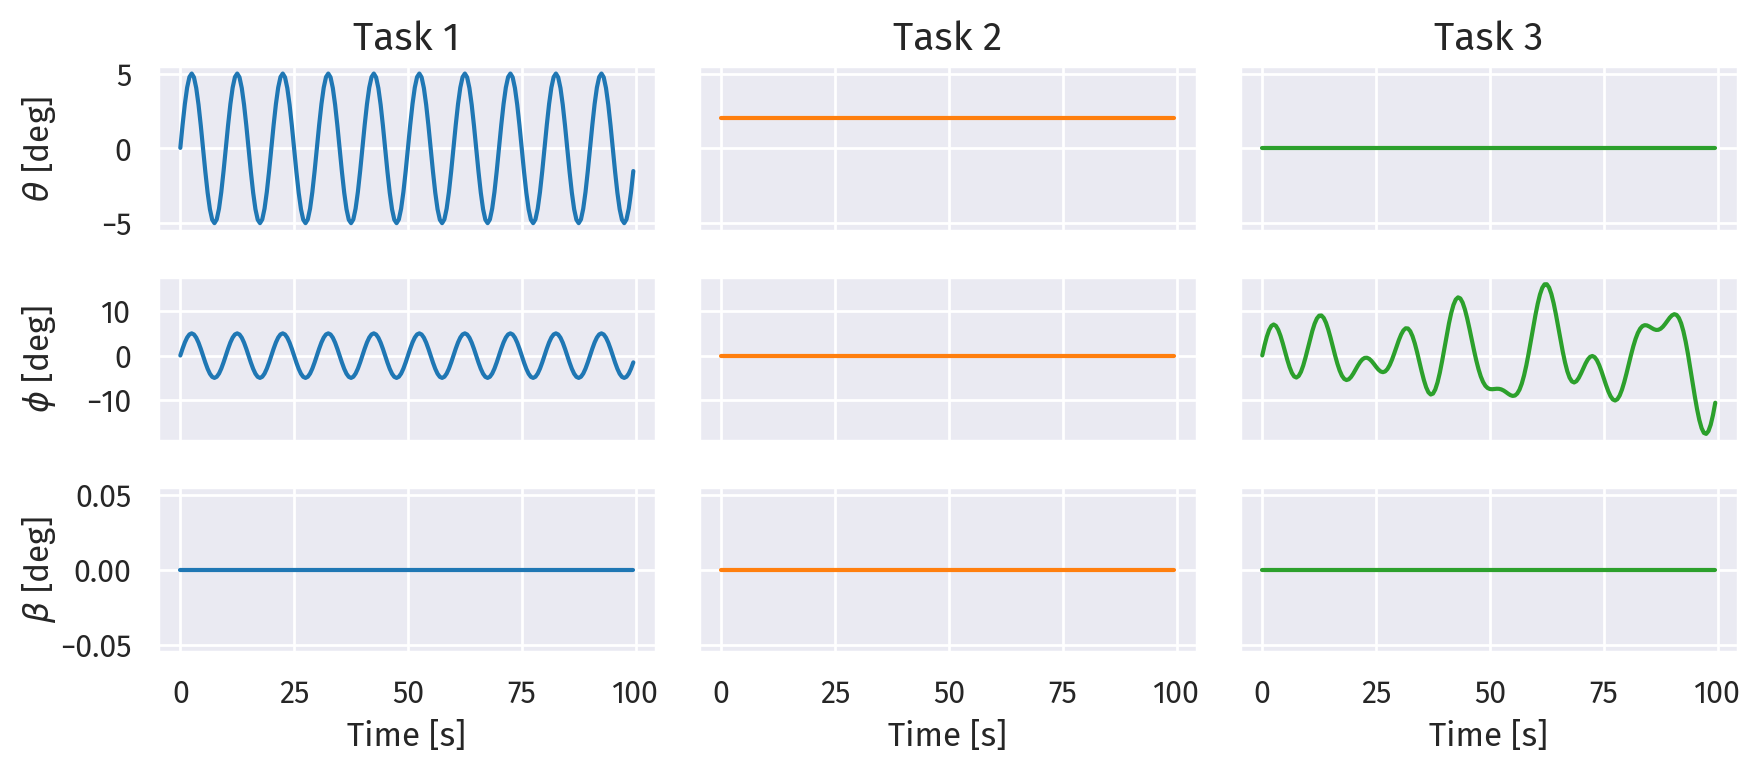

In [90]:
def get_reference_df(run_name):
    df_ref = df_sac_eval[df_sac_eval['id']== run_name][['theta_ref', 'phi_ref', 'beta_ref', 'step']]
    df_ref[['theta_ref', 'phi_ref', 'beta_ref']] = df_ref[['theta_ref', 'phi_ref', 'beta_ref']].apply(np.rad2deg)
    df_ref['step'] = df_ref['step'] *0.01
    return df_ref

fig, ax = plt.subplots(3, 3, figsize=(9, 4), dpi=200, sharex=True, sharey='row')
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
for idx, task in enumerate(['Task 1', 'Task 2', 'Task 3']):
    run_name = df_reference_run_names[df_reference_run_names['task_train']==task].name.values[0]
    df_ref = get_reference_df(run_name)
    sns.lineplot(data=df_ref, x='step', y='theta_ref', ax=ax[0, idx], label=task, legend=False, color=colors[idx])
    sns.lineplot(data=df_ref, x='step', y='phi_ref', ax=ax[1, idx], color=colors[idx])
    sns.lineplot(data=df_ref, x='step', y='beta_ref', ax=ax[2, idx], color=colors[idx])
    ax[0, idx].set_title(task)

# fig.legend(loc='upper center', ncol=3, fontsize=12)
plt.tight_layout()

ax[0,0].set_ylabel(r"$\theta$ [deg]")
ax[0,0].yaxis.set_label_coords(-0.2, 0.5)
ax[1,0].set_ylabel(r"$\phi$ [deg]")
ax[1,0].yaxis.set_label_coords(-0.2, 0.5)
ax[2,0].set_ylabel(r"$\beta$ [deg]")
ax[2,0].yaxis.set_label_coords(-0.2, 0.5)
for i in range(3):
    ax[2, i].set_xlabel("Time [s]")
    # Change title font size
    ax[0, i].title.set_fontsize(14)

if False:
    plt.savefig(f"{str(Path().paper_figures)}/reference_signals.pdf", bbox_inches='tight')

In [43]:
df_summary_sac.task_train.unique()

array(['exp1_pseudo_random_sin', 'exp1_fixed_sin', 'exp1_hold'],
      dtype=object)

In [40]:
df_summary_sac.columns

Index(['Unnamed: 0', 'name', 'seed', 'agent', 'lr_a_high', 'lr_c_high',
       'sac_model', 'task_train', 'discount_factor', 'discount_factor_model',
       'online/beta_ref', 'online_states/step', 'citation_states/alpha',
       '_runtime', 'train/step', 'online/beta', 'learning/step',
       'actor/idhp_w_1', 'eval/theta_sq_error', 'online_states/alpha',
       'eval/phi', 'eval/phi_ref', 'learning/rewards', 'citation_states/q',
       'citation_states/he', 'citation_states/phi', '_step', 'eval/reward',
       'online/nmae', 'online/theta', 'online/mean_error', 'eval/de',
       'eval/beta_sq_error', 'citation_states/theta', 'online/phi',
       'online_states/q', 'online_states/ye', 'online_states/phi',
       'citation_inputs/da', 'online/theta_ref', 'citation_inputs/step',
       'eval/theta_ref', 'online_states/V', 'online/action_de',
       'online_states/he', 'online/phi_ref', 'online_states/xe',
       'online_states/psi', 'eval/nmae', 'online_states/r', 'sac_improvement',
   